<a href="https://colab.research.google.com/github/otabek7/Soft_Support_Vector_Machines/blob/main/Mavlonov_Soft_SVM_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt

class SoftSVM:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization_param=0.1):
      # instantiating and assigning each param to self.
        self.w = None
        self.b = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_ = regularization_param

    def fit(self, X, y):
        # x = Training feature vectors
        # y = Corresponding labels (e.g. +1/-1)
        n_samples, n_features = X.shape
        # instantiating and assigning each param to self.
        self.w = np.zeros(n_features)
        self.b = 0

        # GD loop for a range of epochs
        for epoch in range(self.epochs):
            for i, x_i in enumerate(X):
                if y[i] * (np.dot(x_i, self.w) + self.b) < 1:
                    # Misclassified point
                    self.w = (1 - self.learning_rate * self.lambda_) * self.w + \
                             self.learning_rate * y[i] * x_i
                    self.b = self.b + self.learning_rate * y[i]
                else:
                    # Correctly classified point
                    self.w = (1 - self.learning_rate * self.lambda_) * self.w

        return self.w, self.b

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

For **regularization parameters (λ)** = [0.01, 0.1, 1, 10]
and **learning rate parameter (η)** = *0.001*

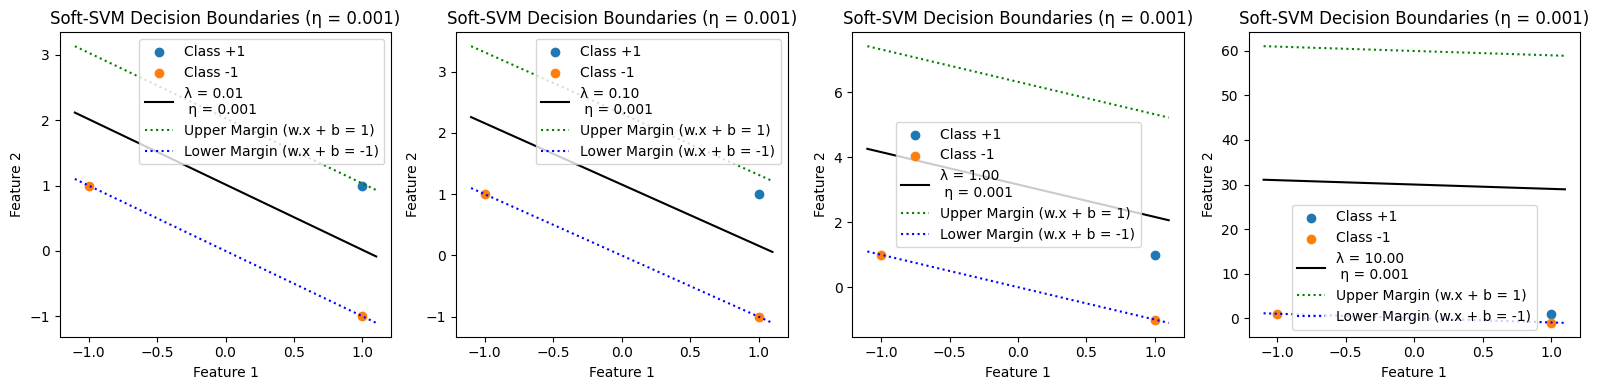

In [59]:
def plot_decision_boundary(ax, X, y, model, reg_param, learning_rate):
    # Plot the training points
    for i, point in enumerate(X):
        if y[i] == 1:
            ax.scatter(point[0], point[1], color='#1f77b4', marker='o', label="Class +1" if i == 0 else "")
        else:
            ax.scatter(point[0], point[1], color='#ff7f0e', marker='o', label="Class -1" if i == 1 else "")

    # Plot the decision boundary
    x_vals = np.array(ax.get_xlim())
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]
    ax.plot(x_vals, y_vals, color='black', label=f"λ = {reg_param:.2f} \n η = {learning_rate:.3f}")

    # Compute margins: Margin boundaries are parallel to the decision boundary and at distance 1/||w|| from it
    norm_w = np.linalg.norm(model.w)

    # Upper margin (w.x + b = 1)
    y_margin_upper = -(model.w[0] * x_vals + model.b - 1) / model.w[1]
    ax.plot(x_vals, y_margin_upper, ':', color='green', label='Upper Margin (w.x + b = 1)')

    # Lower margin (w.x + b = -1)
    y_margin_lower = -(model.w[0] * x_vals + model.b + 1) / model.w[1]
    ax.plot(x_vals, y_margin_lower, ':', color='blue', label='Lower Margin (w.x + b = -1)')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Soft-SVM Decision Boundaries 'f"(η = {learning_rate:.3f})")
    ax.legend()

# Training the dataset
X_train = np.array([[1, 1], [-1, 1], [1, -1]])
y_train = np.array([1, -1, -1])

# runs for a range of regularization parameters
reg_params = [0.01, 0.1, 1, 10]

# Create subplots for side by side comparison
fig, axes = plt.subplots(1, len(reg_params), figsize=(16, 4))

# Train and plot for each regularization parameter
for idx, reg_param in enumerate(reg_params):
    learning_rate = 0.001

    # initializing and training the model
    model = SoftSVM(learning_rate, epochs=1000, regularization_param=reg_param)
    model.fit(X_train, y_train)

    # plotting the decision boundary and the training points
    plot_decision_boundary(axes[idx], X_train, y_train, model, reg_param, learning_rate)

    # Make predictions on the training set
    predictions = model.predict(X_train)
    # print(f"Predictions: {predictions}")
    # print(f"Weight vector: {model.w}, Bias: {model.b}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


For **regularization parameters (λ)** = [0.01, 0.1, 1, 10]
and **learning rate parameter (η)** = *0.01*

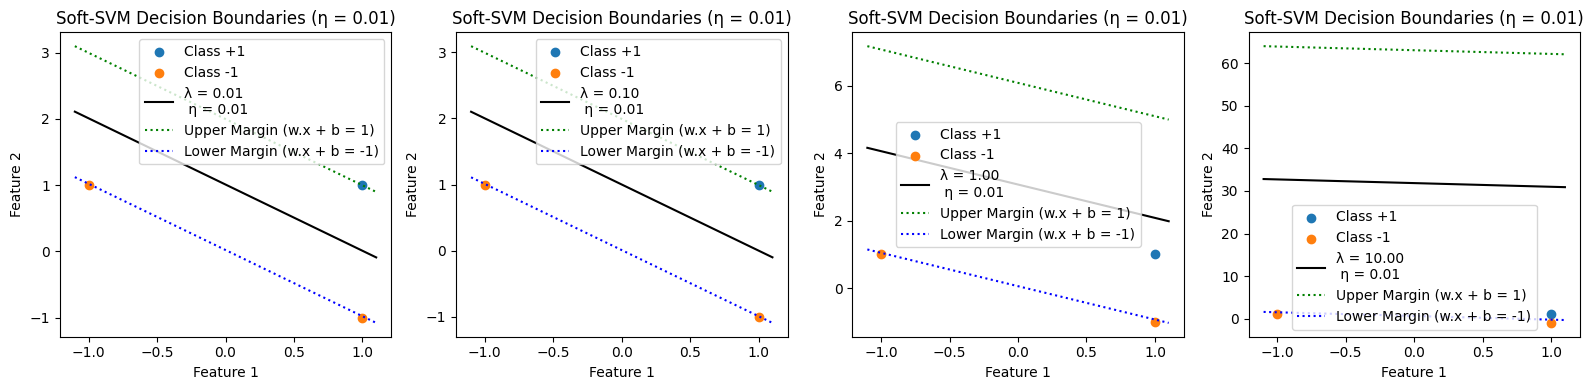

In [60]:
def plot_decision_boundary(ax, X, y, model, reg_param, learning_rate):
    # Plot the training points
    for i, point in enumerate(X):
        if y[i] == 1:
            ax.scatter(point[0], point[1], color='#1f77b4', marker='o', label="Class +1" if i == 0 else "")
        else:
            ax.scatter(point[0], point[1], color='#ff7f0e', marker='o', label="Class -1" if i == 1 else "")

    # Plot the decision boundary
    x_vals = np.array(ax.get_xlim())
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]
    ax.plot(x_vals, y_vals, color='black', label=f"λ = {reg_param:.2f} \n η = {learning_rate:.2f}")


    # Compute margins: Margin boundaries are parallel to the decision boundary and at distance 1/||w|| from it
    norm_w = np.linalg.norm(model.w)

    # Upper margin (w.x + b = 1)
    y_margin_upper = -(model.w[0] * x_vals + model.b - 1) / model.w[1]
    ax.plot(x_vals, y_margin_upper, ':', color='green', label='Upper Margin (w.x + b = 1)')

    # Lower margin (w.x + b = -1)
    y_margin_lower = -(model.w[0] * x_vals + model.b + 1) / model.w[1]
    ax.plot(x_vals, y_margin_lower, ':', color='blue', label='Lower Margin (w.x + b = -1)')


    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Soft-SVM Decision Boundaries 'f"(η = {learning_rate:.2f})")
    ax.legend()

# Training the dataset
X_train = np.array([[1, 1], [-1, 1], [1, -1]])
y_train = np.array([1, -1, -1])

# runs for a range of regularization parameters
reg_params = [0.01, 0.1, 1, 10]

# Create subplots for side by side comparison
fig, axes = plt.subplots(1, len(reg_params), figsize=(16, 4))

# Train and plot for each regularization parameter
for idx, reg_param in enumerate(reg_params):
    learning_rate = 0.01

    # initializing and training the model
    model = SoftSVM(learning_rate, epochs=1000, regularization_param=reg_param)
    model.fit(X_train, y_train)

    # plotting the decision boundary and the training points
    plot_decision_boundary(axes[idx], X_train, y_train, model, reg_param, learning_rate)

    # Make predictions on the training set
    predictions = model.predict(X_train)
    # print(f"Predictions: {predictions}")
    # print(f"Weight vector: {model.w}, Bias: {model.b}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


For **regularization parameters (λ)** = [0.01, 0.1, 1, 10]
and **learning rate parameter (η)** = *0.1*

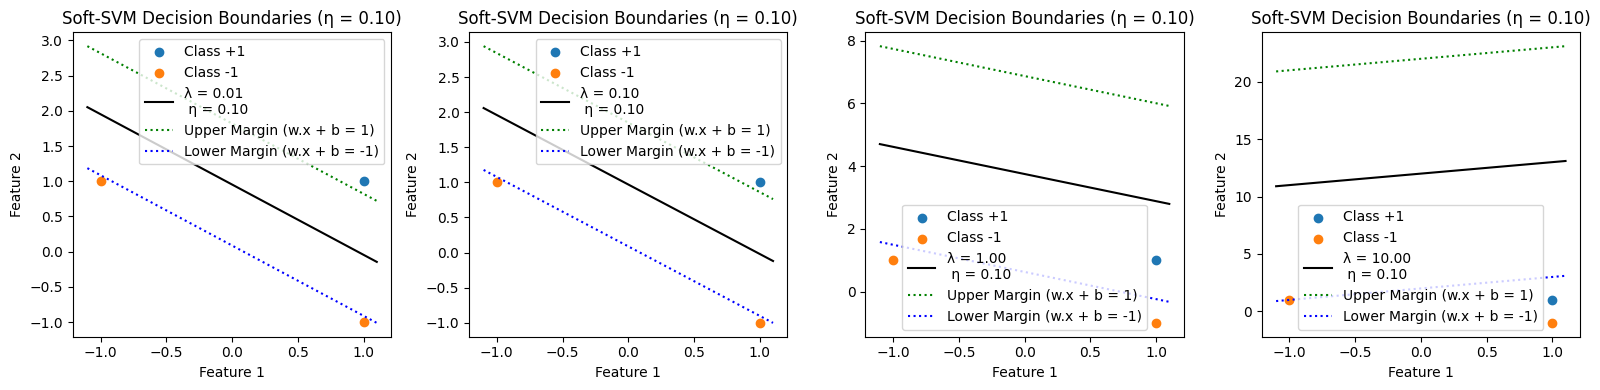

In [61]:
def plot_decision_boundary(ax, X, y, model, reg_param, learning_rate):
    # Plot the training points
    for i, point in enumerate(X):
        if y[i] == 1:
            ax.scatter(point[0], point[1], color='#1f77b4', marker='o', label="Class +1" if i == 0 else "")
        else:
            ax.scatter(point[0], point[1], color='#ff7f0e', marker='o', label="Class -1" if i == 1 else "")

    # Plot the decision boundary
    x_vals = np.array(ax.get_xlim())
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]
    ax.plot(x_vals, y_vals, color='black', label=f"λ = {reg_param:.2f} \n η = {learning_rate:.2f}")



    # Compute margins: Margin boundaries are parallel to the decision boundary and at distance 1/||w|| from it
    norm_w = np.linalg.norm(model.w)

    # Upper margin (w.x + b = 1)
    y_margin_upper = -(model.w[0] * x_vals + model.b - 1) / model.w[1]
    ax.plot(x_vals, y_margin_upper, ':', color='green', label='Upper Margin (w.x + b = 1)')

    # Lower margin (w.x + b = -1)
    y_margin_lower = -(model.w[0] * x_vals + model.b + 1) / model.w[1]
    ax.plot(x_vals, y_margin_lower, ':', color='blue', label='Lower Margin (w.x + b = -1)')



    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Soft-SVM Decision Boundaries 'f"(η = {learning_rate:.2f})")
    ax.legend()

# Training the dataset
X_train = np.array([[1, 1], [-1, 1], [1, -1]])
y_train = np.array([1, -1, -1])

# runs for a range of regularization parameters
reg_params = [0.01, 0.1, 1, 10]

# Create subplots for side by side comparison
fig, axes = plt.subplots(1, len(reg_params), figsize=(16, 4))

# Train and plot for each regularization parameter
for idx, reg_param in enumerate(reg_params):
    learning_rate = 0.1

    # initializing and training the model
    model = SoftSVM(learning_rate, epochs=1000, regularization_param=reg_param)
    model.fit(X_train, y_train)

    # plotting the decision boundary and the training points
    plot_decision_boundary(axes[idx], X_train, y_train, model, reg_param, learning_rate)

    # Make predictions on the training set
    predictions = model.predict(X_train)
    # print(f"Predictions: {predictions}")
    # print(f"Weight vector: {model.w}, Bias: {model.b}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Regularization Parameter λ:

Small λ (e.g., 0.01): The model is less regularized, meaning that it allows the decision boundary to fit the training data more closely, which can result in overfitting.

Large λ (e.g., 10): The model is highly regularized, which penalizes large weights, leading to a more rigid and generalized decision boundary. This could result in underfitting, especially on complex datasets.

Learning Rate η:
The learning rate affects convergence speed. If it’s too high, the algorithm may not converge, and if it’s too low, the convergence will be slow. You may need to adjust this parameter accordingly for different λ values.

Epochs:
Increasing the number of epochs gives more time for the gradient descent to optimize the weights.